In [107]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
base = Path.cwd().parents[1]
df = pd.read_csv(base / "Data_clean/caract-2005-2023.csv")

df.head()


C:\Users\jeanl\AppData\Local\Temp\ipykernel_22396\3316542733.py:8: DtypeWarning: Columns (10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base / "Data_clean/caract-2005-2023.csv")


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,Accident_Id,date,weekday
0,2.005000e+11,2005,1,12,19:00,3,2,1,1.0,3.0,11,CD41B,M,50.515,2.944,590,NaN,2005-01-12,3
1,2.005000e+11,2005,1,21,16:00,1,2,1,1.0,1.0,51,rue de Lille,M,50.537,2.802,590,NaN,2005-01-21,5
2,2.005000e+11,2005,1,21,18:45,3,1,1,2.0,1.0,51,NaN,M,50.546,2.800,590,NaN,2005-01-21,5
3,2.005000e+11,2005,1,4,16:15,1,1,1,1.0,5.0,82,NaN,M,50.987,2.408,590,NaN,2005-01-04,2
4,2.005000e+11,2005,1,10,19:45,3,1,1,3.0,6.0,478,NaN,M,50.964,2.475,590,NaN,2005-01-10,1


In [108]:
df_night = df[(df["hrmn"] > "19:00") | (df["hrmn"] < "06:00")]

In [109]:

df_night = df_night.copy()  
df_night["night"] = df_night["weekday"]

mask_early_morning = df_night["hrmn"] < "06:00"


df_night.loc[mask_early_morning & (df_night["weekday"] != 1), "night"] = df_night["weekday"] - 1
df_night.loc[mask_early_morning & (df_night["weekday"] == 1), "night"] = 7
df_night = df_night.drop_duplicates(subset=['Num_Acc'], keep='first')

print("Exemples d'ajustement pour les heures < 06:00:")
early_morning = df_night[df_night["hrmn"] < "06:00"][["hrmn", "weekday", "night"]].head(10)
print(early_morning)

print(f"\nDistribution des accidents de nuit par jour:")
print(df_night["night"].value_counts().sort_index())

Exemples d'ajustement pour les heures < 06:00:
      hrmn  weekday  night
10   02:30        7      6
27   00:45        7      6
36   00:15        6      5
41   05:00        4      3
69   00:30        6      5
76   03:00        4      3
81   05:00        6      5
84   05:30        7      6
105  02:30        7      6
114  05:30        7      6

Distribution des accidents de nuit par jour:
night
1    31570
2    35389
3    36978
4    41001
5    60584
6    59603
7    33487
Name: count, dtype: int64


In [110]:
df_night.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298612 entries, 4 to 1231691
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      298611 non-null  float64
 1   an           298612 non-null  int64  
 2   mois         298612 non-null  int64  
 3   jour         298612 non-null  int64  
 4   hrmn         298612 non-null  object 
 5   lum          298612 non-null  int64  
 6   agg          298612 non-null  int64  
 7   int          298612 non-null  int64  
 8   atm          298589 non-null  float64
 9   col          298604 non-null  float64
 10  com          298611 non-null  object 
 11  adr          260174 non-null  object 
 12  gps          121971 non-null  object 
 13  lat          175863 non-null  float64
 14  long         175042 non-null  float64
 15  dep          298612 non-null  object 
 16  Accident_Id  1 non-null       float64
 17  date         298612 non-null  object 
 18  weekday      298612 non-null

In [111]:
df_night.Num_Acc.nunique()

298611

## Nombre d'accident chaque soir


       nb_accidents
night              
1             31570
2             35389
3             36978
4             41000
5             60584
6             59603
7             33487


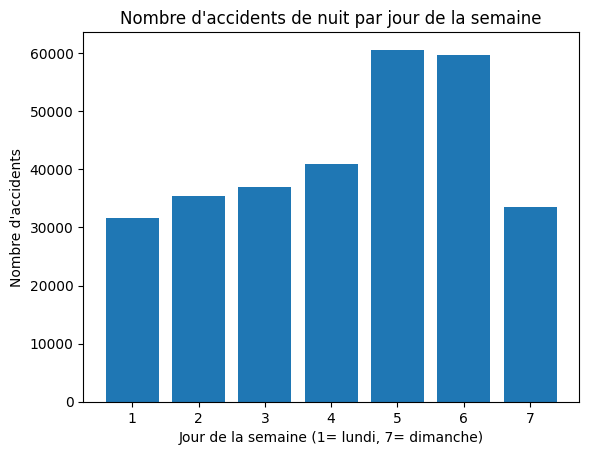

In [112]:
nb_accidents = df_night.groupby("night").Num_Acc.nunique().to_frame(name = "nb_accidents")
print(nb_accidents)
plt.bar(nb_accidents.index, nb_accidents["nb_accidents"])
plt.xlabel("Jour de la semaine (1= lundi, 7= dimanche)")
plt.ylabel("Nombre d'accidents")
plt.title("Nombre d'accidents de nuit par jour de la semaine")
plt.show()

## Fusion des datasets

In [ ]:
base = Path.cwd().parents[1]
df_lieux = pd.read_csv(base / "Data_clean/lieux-2005-2023.csv")
df_vehicules = pd.read_csv(base / "Data_clean/vehicules-2005-2023.csv", index_col=0)
df_usagers = pd.read_csv(base / "Data_clean/usagers-2005-2023.csv",index_col=0)
df_night["Num_Acc"] = df_night["Num_Acc"].fillna(0).astype(int)
df_lieux.head()


C:\Users\jeanl\AppData\Local\Temp\ipykernel_22396\3696902100.py:2: DtypeWarning: Columns (2,6,7,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(base / "Data_clean/lieux-2005-2023.csv")
C:\Users\jeanl\AppData\Local\Temp\ipykernel_22396\3696902100.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicules = pd.read_csv(base / "Data_clean/vehicules-2005-2023.csv", index_col=0)
C:\Users\jeanl\AppData\Local\Temp\ipykernel_22396\3696902100.py:4: DtypeWarning: Columns (9,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usagers = pd.read_csv(base / "Data_clean/usagers-2005-2023.csv",index_col=0)


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,200500000001,3.0,41.0,0.0,B,2.0,2,1.0,430.0,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN
1,200500000002,2.0,41.0,0.0,NaN,0.0,2,0.0,0.0,1.0,1.0,1.0,0,100,1.0,0.0,5.0,0.0,NaN
2,200500000003,2.0,41.0,0.0,NaN,0.0,0,0.0,0.0,1.0,1.0,1.0,0,0,2.0,0.0,5.0,0.0,NaN
3,200500000004,3.0,916.0,0.0,NaN,2.0,2,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0.0,1.0,0.0,NaN
4,200500000005,3.0,110.0,0.0,NaN,2.0,2,24.0,630.0,0.0,1.0,3.0,0,59,2.0,0.0,3.0,0.0,NaN


In [115]:
df_complet = df_night.merge(df_lieux, on="Num_Acc", how="inner")
df_complet = df_complet.drop_duplicates(subset=['Num_Acc'], keep='first')

In [116]:
df_complet = df_complet.merge(df_vehicules, on="Num_Acc", how = "inner")


In [100]:
df_complet = df_complet.merge(df_usagers, on="Num_Acc", how = "inner")

In [ ]:
pd.set_option('display.max_columns', None)  
df_complet

## Nombre de vehicules Impliqué dans un accident

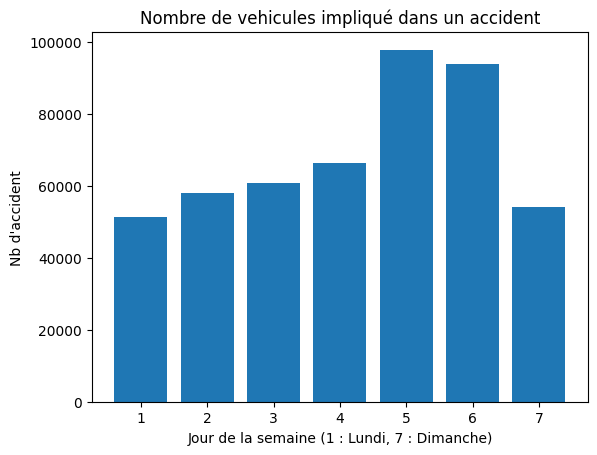

In [126]:
nb_vehicules = df_complet.groupby("night").size()
plt.bar(nb_vehicules.index, nb_vehicules)
plt.title('Nombre de vehicules impliqué dans un accident')
plt.xlabel("Jour de la semaine (1 : Lundi, 7 : Dimanche)")
plt.ylabel("Nb d'accident")
plt.show()


In [96]:
df_usagers

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,id_usager
0,200500000001,1,1,4,1,1,11,0,0,0,1976,A01,NaN,0,0,0,NaN
1,200500000001,1,1,3,2,3,11,0,0,0,1968,B02,NaN,0,0,0,NaN
2,200500000001,2,2,1,1,0,11,0,0,0,1964,B02,NaN,0,0,0,NaN
3,200500000001,4,2,1,1,0,31,0,0,0,2004,B02,NaN,0,0,0,NaN
4,200500000001,5,2,1,1,0,11,0,0,0,1998,B02,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125784,202300054821,1,1,4,1,1,0,0,0,-1,1971,A01,155 583 346,2,0,-1,203 720 720
125785,202300054821,1,1,1,2,1,0,0,0,-1,1968,B01,155 583 347,1,0,-1,203 720 721
125786,202300054822,2,2,1,2,2,0,-1,-1,-1,2003,A01,155 583 344,1,-1,-1,203 720 717
125787,202300054822,1,1,1,2,1,0,-1,-1,-1,2002,A01,155 583 344,1,-1,-1,203 720 718
